<a href="https://colab.research.google.com/github/najkashyap/Model-to-classify-the-emails./blob/main/Copy_of_Naive_bais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This block is only for access of file using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials =GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive first change its setting of share and make it public.Copy its ID from its last part of the adress then specify
downloaded =drive.CreateFile({"id":"1T7NJi6WI3phXHlas-_62IE5cOXZcaqTL"})
downloaded.GetContentFile("spam.csv")

In [ ]:
import pandas as pd
import numpy as np
import string

In [ ]:
#import the data file 
filename ="spam.csv"
df_sms = pd.read_csv("spam.csv",encoding="latin-1")
#df_sms

In [ ]:
#deleting unnamed columns 
df_sms = df_sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns ={"v1":"label","v2":"sms"})
#df_sms

In [ ]:
#print number of records
l = len(df_sms)
print(l)

#example of accessing a column in a panda data frame
#df_sms.label    #1st column
print(df_sms.sms[5571])     #2nd column


5572
Rofl. Its true to its name


In [ ]:
#define a function to convert sms text to lower case and remove stop words, Punctuations and numbers
def preprocess_text(input_text):
  input_text = input_text.lower()
  stopwords = ["the","what","is","a","an","of","that"]
  querywords =input_text.split()
  

  resultwords = [word for word in querywords if word not in stopwords]
  result = ' '.join(resultwords)
  
  exclude = set(string.punctuation)
  result = ''.join(ch for ch in result if ch not in exclude)
  

  exclude = set("0123456789")
  result = ''.join(ch for ch in result if ch not in exclude)
  

  return result





In [ ]:
# test the processing function 
preprocess_test = preprocess_text("Hello, where4 is he.")
print(preprocess_test)

hello where he


In [ ]:
# preprocess all the text in df_sms
l = len(df_sms)

for i in range(0,l):
  df_sms["sms"][i]=preprocess_text(df_sms["sms"][i])


 




In [ ]:
# Divide the dataframe into training and testing set
from sklearn.utils import shuffle
df_sms = shuffle(df_sms)
training_dataset = df_sms.iloc[:round(len(df_sms)*0.9),:]    #90% data into training 
testing_dataset = df_sms.iloc[round(len(df_sms)*0.9):,:]     #10% data into testing 
spam_subset = training_dataset.query("label=='spam'")
ham_subset =training_dataset.query("label == 'ham'")
#print(spam_subset)



In [ ]:
# Lets combine all the text of training data set into a paragraph
l_train = len(training_dataset)
req_para = ""
for i in training_dataset.index:
  req_para = req_para + " " + training_dataset["sms"][i]
print(req_para)



 wen ur lovable bcums angry wid u dnt take it seriously coz being angry d most childish n true way showing deep affection care n luv kettoda manda have nice day da so many people seems to be special at first sight but only very few will remain special to you till your last sight maintain them till life ends take cr da  was thinking about chuckin ur red green n black trainners  save carryin them bac on train have you bookedthe hut and also your time off how are you by way argh my g spotty anyway only thing i remember from research we did was province and sterling were only problemfree places we looked at oic i saw him too but i tot he din c me i found group liao going on nothing greatbye urgh coach hot smells chip fat thanks again especially for duvet not predictive text word cant believe i said so many things to you this morning when all i really wanted to say was good morning i love you have beautiful morning see you in library later private your  account statement for  xxxxxx shows  

In [ ]:
#collecting all the unique words in a list
unique_words = []
unwanted = ""
para_list = req_para.split(" ")
para_list.remove(unwanted)
for i in para_list:
  if i not in unique_words:
    unique_words.append(i)
print(unique_words)



['wen', 'ur', 'lovable', 'bcums', 'angry', 'wid', 'u', 'dnt', 'take', 'it', 'seriously', 'coz', 'being', 'd', 'most', 'childish', 'n', 'true', 'way', 'showing', 'deep', 'affection', 'care', 'luv', 'kettoda', 'manda', 'have', 'nice', 'day', 'da', 'so', 'many', 'people', 'seems', 'to', 'be', 'special', 'at', 'first', 'sight', 'but', 'only', 'very', 'few', 'will', 'remain', 'you', 'till', 'your', 'last', 'maintain', 'them', 'life', 'ends', 'cr', '', 'was', 'thinking', 'about', 'chuckin', 'red', 'green', 'black', 'trainners', 'save', 'carryin', 'bac', 'on', 'train', 'bookedthe', 'hut', 'and', 'also', 'time', 'off', 'how', 'are', 'by', 'argh', 'my', 'g', 'spotty', 'anyway', 'thing', 'i', 'remember', 'from', 'research', 'we', 'did', 'province', 'sterling', 'were', 'problemfree', 'places', 'looked', 'oic', 'saw', 'him', 'too', 'tot', 'he', 'din', 'c', 'me', 'found', 'group', 'liao', 'going', 'nothing', 'greatbye', 'urgh', 'coach', 'hot', 'smells', 'chip', 'fat', 'thanks', 'again', 'especially

In [ ]:
#for i in spam_subset["sms"]:
  #print(i,"\n")




In [ ]:
# for each word find in spam probablity P(word/spam) and P(word/ham)
count_dic_inspam = {}
count_dic_inham = {} 

for j in unique_words:
  count_dic_inspam[j] = 0
  for i in spam_subset["sms"]:
    k = i.split(" ")
    if j in k:
      count_dic_inspam[j] += 1
     
for j in unique_words:
  count_dic_inham[j] = 0
  for i in ham_subset["sms"]:
    k = i.split(" ")
    if j in k:
      count_dic_inham[j] += 1
print(count_dic_inspam)
print(count_dic_inham)






{'wen': 0, 'ur': 100, 'lovable': 0, 'bcums': 0, 'angry': 0, 'wid': 4, 'u': 105, 'dnt': 0, 'take': 12, 'it': 23, 'seriously': 0, 'coz': 0, 'being': 6, 'd': 2, 'most': 2, 'childish': 0, 'n': 8, 'true': 3, 'way': 1, 'showing': 0, 'deep': 0, 'affection': 0, 'care': 4, 'luv': 5, 'kettoda': 0, 'manda': 0, 'have': 116, 'nice': 0, 'day': 16, 'da': 1, 'so': 21, 'many': 3, 'people': 3, 'seems': 0, 'to': 413, 'be': 41, 'special': 11, 'at': 23, 'first': 4, 'sight': 0, 'but': 5, 'only': 72, 'very': 2, 'few': 0, 'will': 36, 'remain': 0, 'you': 215, 'till': 2, 'your': 209, 'last': 12, 'maintain': 0, 'them': 2, 'life': 3, 'ends': 4, 'cr': 7, '': 604, 'was': 6, 'thinking': 0, 'about': 7, 'chuckin': 0, 'red': 1, 'green': 0, 'black': 1, 'trainners': 0, 'save': 3, 'carryin': 0, 'bac': 0, 'on': 108, 'train': 0, 'bookedthe': 0, 'hut': 0, 'and': 97, 'also': 3, 'time': 15, 'off': 4, 'how': 6, 'are': 71, 'by': 29, 'argh': 0, 'my': 10, 'g': 10, 'spotty': 0, 'anyway': 0, 'thing': 1, 'i': 44, 'remember': 0, 'from

In [ ]:
#making a panda dataframe for storing the respective probablity
column = ["In sapm probablity", "In ham probablity"]
probability_table1 = pd.DataFrame(index = unique_words, columns = column)
for word in unique_words:
  probability_table1.at[word,"In spam probablity"] = (1+count_dic_inspam[word])/(len(spam_subset))
  probability_table1.at[word,"In ham probablity"] = (1+count_dic_inham[word])/(len(ham_subset))
#probability_table1.sort_values("In spam probablity", axis=0, ascending = False, inplace =True,na_position ='first')
#probability_table1.rename(columns = {"In sapm probablity" : "remove","In ham probablity": "Inhamprobablity","In sapm probablity" : "inspamprobablity"})
probability_table1.columns = ["remove","In ham probablity","In spam probablity"]
probability_table1 = probability_table1.drop(["remove"],axis=1)
probability_table1.sort_values(["In ham probablity","In spam probablity"], axis=0, ascending = False, inplace =True)
probability_table1



,In ham probablity,In spam probablity
i,0.323895,0.067064
you,0.263352,0.321908
to,0.252993,0.616990
,0.211556,0.901639
in,0.150322,0.084948
...,...,...
kath,0.00023,0.002981
manchester,0.00023,0.002981
hottest,0.00023,0.002981
splashmobile,0.00023,0.002981


In [ ]:

#inspamcount = 0
#inhamcount = 0
#column = ["In sapm probablity", "In ham probablity"]
#probability_table2 = pd.DataFrame(index = unique_words, columns=column)
#print(unique_words)
#for i in spam_subset["sms"]:
  #if i.find("go")!=-1:
    #inspamcount+=1
#for i in ham_subset["sms"]:
  #if i.find("go")!=-1:
    #inhamcount+=1
#print(inspamcount)
#print(inhamcount)
#for word in unique_words:
  #inspamcount = 0
  #inhamcount = 0
  #for i in spam_subset["sms"]:
    #if(i.find(word)!=-1):
      #inspamcount+=1
  #for i in ham_subset["sms"]:
    #if(i.find(word)!=-1):
      #inhamcount+=1
  #print(f"{word} : {inspamcount}")
  #print(f"{word} : {inhamcount}")
  #probability_table2.at[word,"In spam probablity"] = (inspamcount)/(len(spam_subset))
  #probability_table2.at[word,"In ham probablity"] = (inhamcount)/(len(ham_subset))
#probability_table2.sort_values("In spam probablity", axis=0, ascending = False, inplace =True,na_position ='first')
#probability_table2

probability_table1.at["i","In ham probablity"]



0.3304928604329802

In [ ]:
print(count_dic_inspam["go"])
print(count_dic_inham["go"])


27
208


In [ ]:
str1 = "go until jurong point crazy available only in bugis n great"
print(str1.split(" "))

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great']


In [ ]:
word = 'geeks longfor geeks'
print(word.find('for'))

10


In [ ]:
print(len(spam_subset))
print(len(training_dataset))
print(len(ham_subset))


673
5015
4342


#Assignment 1

In [ ]:
# in training data set
#calculating the the probablity of spam messages P(S)
def check_mssg(mssg_dataset):
  p_s = len(spam_subset)/len(training_dataset)
  p_h = len(ham_subset)/len(training_dataset)
  columns = ["label","sms"]
  predicted_chart = pd.DataFrame(columns=columns)
  count = 0
  for i in mssg_dataset["sms"]:
    count += 1
    mssg_list = i.split(" ")
    deciding_words = []
    for j in mssg_list:
      if j in unique_words:
        deciding_words.append(j)


    number1 = 1                         #calculating for ham probablity
    number2 =1
    for k in deciding_words:
      number_1 = number1 * probability_table1.at[k,"In ham probablity"]
    final_prob1 = number1 * p_h


    for k in deciding_words:             #calculation for spam probablity
      number_2 = number2 * probability_table1.at[k,"In spam probablity"]
    final_prob2 = number2 * p_s

    if final_prob1 > final_prob2:
     predicted_chart.at[count -1,"sms"] = i
     predicted_chart.at[count -1,"label"] = "ham"
    else:
     predicted_chart.at[count -1,"sms"] = i
     predicted_chart.at[count -1,"label"] = "spam"
  return predicted_chart



  
     




  



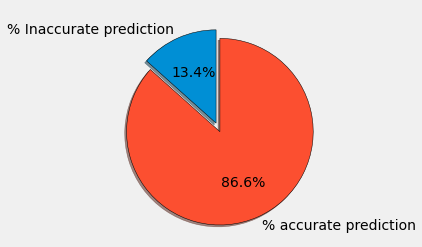

In [ ]:
# mesuring the accuracy for training data set

from matplotlib import pyplot as plt
predicted_dataset = check_mssg(training_dataset)
y_axis = []
count = 0
for i in training_dataset.label:
  count += 1
  j = predicted_dataset.at[count -1,"label"]
  if j == i:
    y_axis.append(1)
  else:
    y_axis.append(0)

count_0 = y_axis.count(0)
count_1 = y_axis.count(1) 

plt.style.use('fivethirtyeight')
slices = [count_0,count_1]
labels = ["% Inaccurate prediction","% accurate prediction"]
explode = [0,0.1]
#plt.hist(y_axis)
plt.pie(slices,labels=labels,explode=explode,shadow =True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()





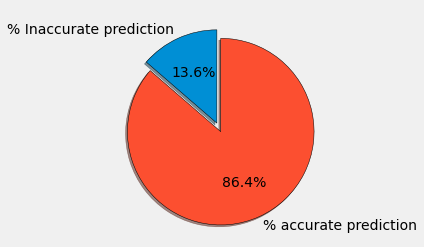

In [ ]:
from matplotlib import pyplot as plt
predicted_dataset = check_mssg(testing_dataset)
y_axis = []
count = 0
for i in testing_dataset.label:
  count += 1
  j = predicted_dataset.at[count -1,"label"]
  if j == i:
    y_axis.append(1)
  else:
    y_axis.append(0)

count_0 = y_axis.count(0)
count_1 = y_axis.count(1) 

plt.style.use('fivethirtyeight')
slices = [count_0,count_1]
labels = ["% Inaccurate prediction","% accurate prediction"]
explode = [0,0.1]
#plt.hist(y_axis)
plt.pie(slices,labels=labels,explode=explode,shadow =True,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()